enegy of particle:5557.841 keV


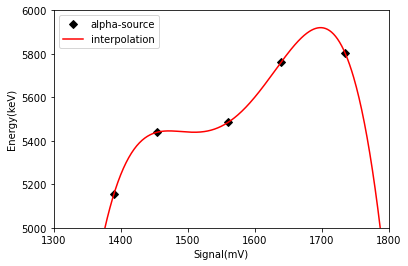

In [1]:
import numpy as np
import matplotlib.pylab as pl

energy_alpha_source=np.zeros(5,dtype=float)
signal_alpha_source=np.zeros(5,dtype=float)

with open('calibrate.dat','r') as fin:
    i = 0
    for lines in fin:
        words=lines.split()
        energy_alpha_source[i]=float(words[0])
        signal_alpha_source[i]=float(words[1])
        i = i + 1

def lagr_poly(x0,y0,n,x):
    y=0.0
    for i in range(0,n):
        p=1.0
        for j in range(0,n):
            if(i!=j):
               p=p*(x-x0[j])/(x0[i]-x0[j])
        y=y+p*y0[i]
    return y

signal=np.arange(1300,1800,1)
energy=lagr_poly(signal_alpha_source,energy_alpha_source,5,signal)

print('enegy of particle:%8.3f keV'%lagr_poly(signal_alpha_source,energy_alpha_source,5,1588))
pl.plot(signal_alpha_source,energy_alpha_source,'kD',label='alpha-source')
pl.plot(signal,energy,'r-',label='interpolation')

pl.xlabel('Signal(mV)')
pl.ylabel('Energy(keV)')

pl.xlim(1300,1800)
pl.ylim(5000,6000)

pl.legend(loc='upper left')
pl.show()
